In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
import random as rng

In [4]:
img = cv2.imread("../dataset/13สำเรียง PRE OP   raptor LDFA MPTA awing15.jpg")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

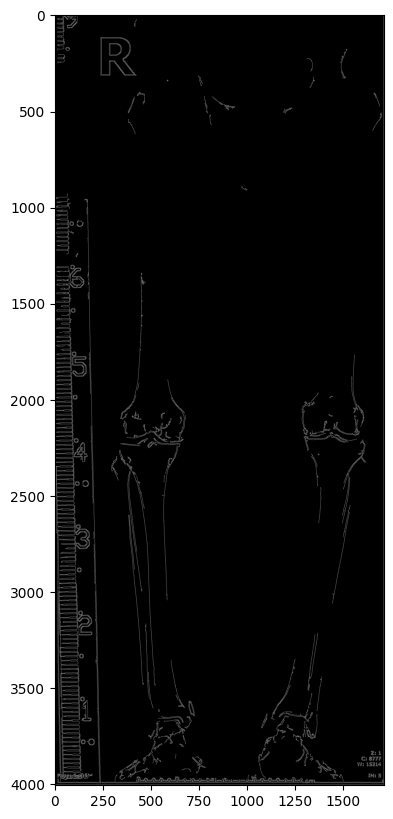

In [5]:
sigma = 2
k = 1.6
s1 = cv2.GaussianBlur(imgGray, ksize=(0,0), sigmaX=k*sigma)
s2 = cv2.GaussianBlur(imgGray, ksize=(0,0), 
                      sigmaX=sigma
                      )
imgGray = cv2.subtract(s2, s1)

imgGrayEdge = cv2.Canny(imgGray, 0, 25, 25)

plt.figure(figsize=(10,10))
plt.imshow(imgGrayEdge, cmap="gray")

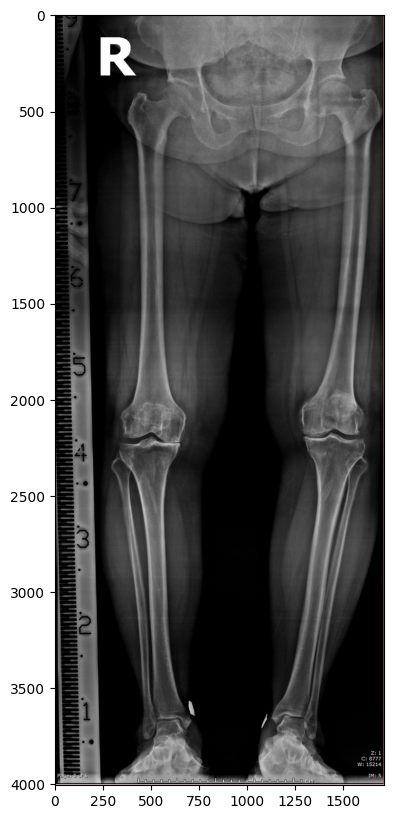

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

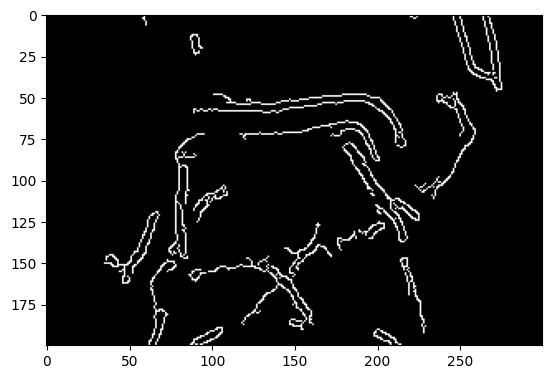

In [11]:
knee = imgGrayEdge[3600:3800,450:750]
plt.imshow(knee, cmap='gray')

In [109]:
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# knee_dilate = cv2.dilate(knee,kernel,iterations = 1)
# contours, hierarchy = cv2.findContours(knee_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# knee_copy = knee.copy()
# cv2.drawContours(knee_copy, contours, -1, (0, 255, 0), 2)

# plt.imshow(knee_copy)
# # print(contours)

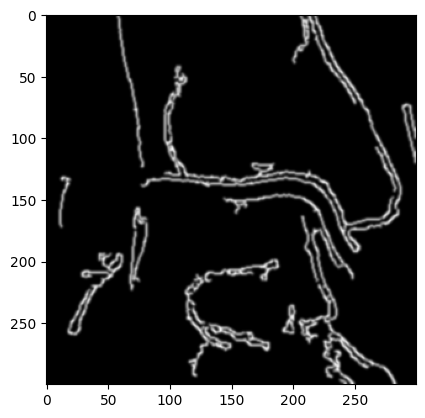

In [110]:
s1 = cv2.GaussianBlur(knee, ksize=(0,0), sigmaX=1)
plt.imshow(s1,cmap="gray")

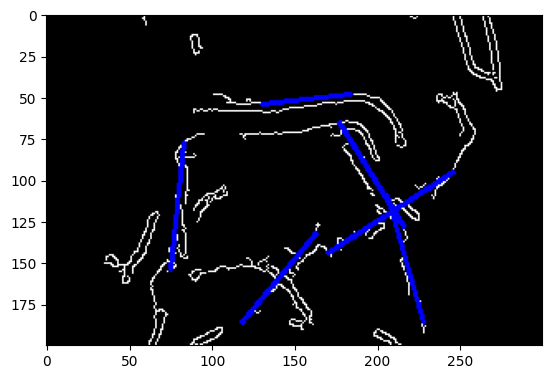

In [14]:
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
lines = cv2.HoughLinesP(knee, 2, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(kneeRGB, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(kneeRGB, cmap="gray")

In [15]:
a = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2 - y1) / (x2 - x1)
    if(abs(slope) < 0.2):
        a.append(line)

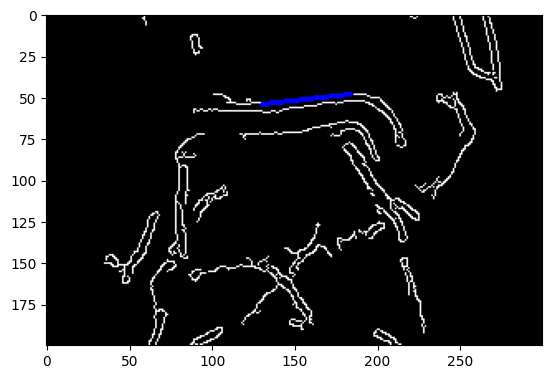

In [16]:
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
for line in a:
    x1, y1, x2, y2 = line[0]
    cv2.line(kneeRGB, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.imshow(kneeRGB, cmap="gray")

In [17]:
select_line = a[0][0]
for i in a:
    if(i[0][1] > select_line[1]):
        select_line = i[0]

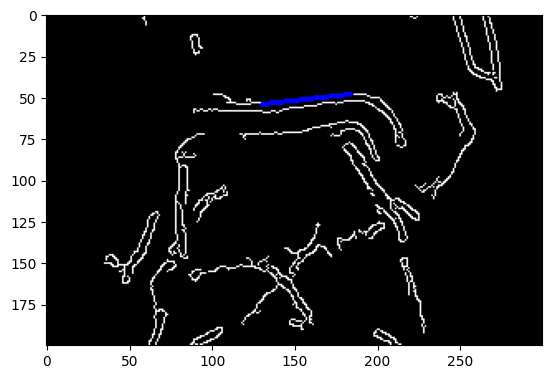

In [18]:
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
x1, y1, x2, y2 = select_line
cv2.line(kneeRGB, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.imshow(kneeRGB, cmap="gray")

In [19]:
def midpoint(p1, p2):
    return (p1+p2)/2     # or *0.5

[157.  51.]


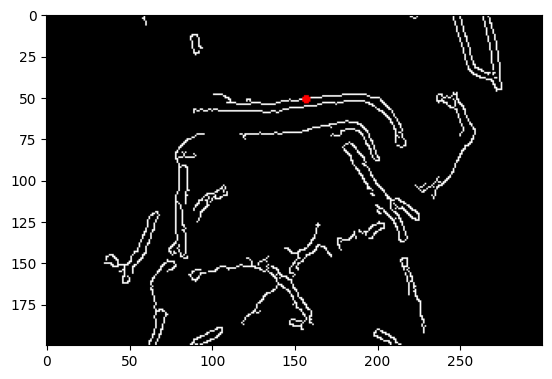

In [20]:
x1, y1, x2, y2 = select_line
m = midpoint(np.array([x1,y1]), np.array([x2,y2]))
print(m)
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
image = cv2.circle(kneeRGB, (int(m[0]), int(m[1])), 1, [255,0,0], 2)
plt.imshow(image)

In [21]:
def select_corner_point(selected_line, point):
    x1, y1, x2, y2 = selected_line
    y, x = point
    if(abs(x-x1) < 50 and abs(y-y1) < 10):
        return point
    elif(abs(x-x2) < 50 and abs(y-y2) < 10):
        return point
    return -1

(200, 300, 3)
(200, 300)


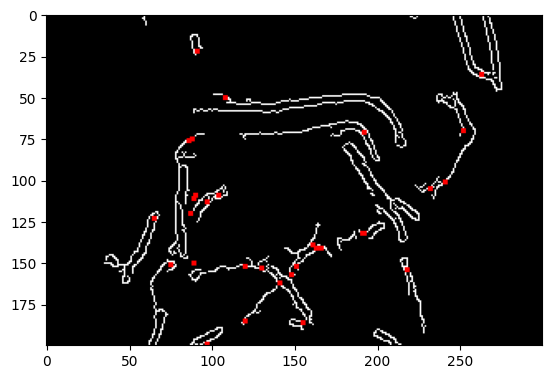

In [22]:
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
dst = cv2.cornerHarris(knee,2,23,0.24)
print(kneeRGB.shape)
dst = cv2.dilate(dst,None)
print(dst.shape)

kneeRGB[dst>0.02*dst.max()]=[255,0,0]

plt.imshow(kneeRGB)

In [23]:
tmp = dst>0.02*dst.max()
all_coor = []
for i in range(tmp.shape[0]):
    for j in range(tmp.shape[1]):
        if(tmp[i,j]):
            all_coor.append((i,j))

In [24]:
len(all_coor)

265

In [25]:
p = []
for i in all_coor:
    t = select_corner_point(select_line, i)
    if(t != -1):
        p.append(t)

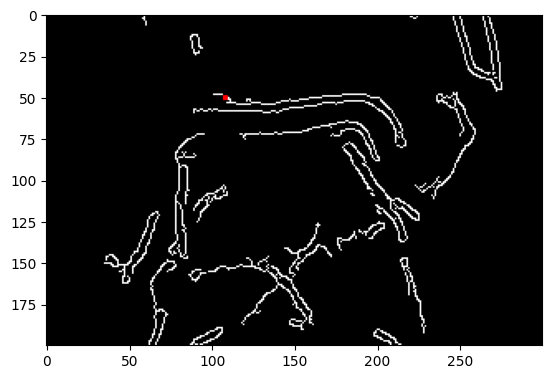

In [26]:
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
for i in p:
    y, x = i
    kneeRGB[y,x] = [255,0,0]
plt.imshow(kneeRGB)

In [99]:
p = sorted(p)

In [100]:
start = p[0]
stop = p[-1]

In [101]:
print(start)
print(stop)

(144, 212)
(154, 222)


[149. 217.]


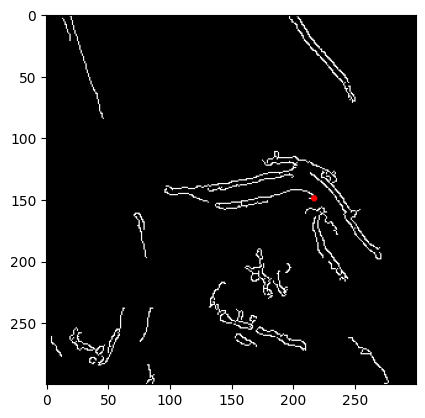

In [102]:
m = midpoint(np.array([start[0], start[1]]), np.array([stop[0], stop[1]]))
print(m)
kneeRGB = cv2.cvtColor(knee, cv2.COLOR_GRAY2RGB)
image = cv2.circle(kneeRGB, (int(m[1]), int(m[0])), 1, [255,0,0], 2)
plt.imshow(kneeRGB)